## Tehtävä 1: Rekisteröityminen IBM:n palveluun

Tehtävän tavoiteena on varmistaa että jokainen on saanut oman avaimen eli tokenin aktivoitua qiskit-palvelussa.

1. Tee IBMid-käyttäjä [tästä](https://login.ibm.com)

2. Kopioi API token [IBM Quantum Experiencen käyttäjäsivulta](https://quantum-computing.ibm.com/account) 

3. Liitä API token heittomerkkien sisään, ja aja koodi

In [1]:
from qiskit import *
from qiskit.visualization import *
#IBMQ.save_account("token_tähän", overwrite=True)
provider = IBMQ.load_account()

## Tehtävä 2: Ohjelmoi seuraava kvanttipiiri, ja simuloi se.
![](images/qc.png)

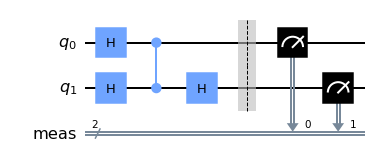

In [3]:
qc = QuantumCircuit(2)

# Ohjelmoi tähän kuvan kvanttipiiri
qc.h(0)
qc.h(1)
qc.cz(0,1)
qc.h(1)
#qc.barrier()

qc.measure_all()
qc.draw(output='mpl')

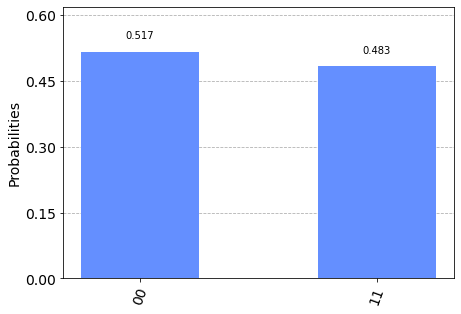

In [4]:
backend = Aer.get_backend('aer_simulator')
plot_histogram(backend.run(qc).result().get_counts())

## Tehtävä 3: Aja sama ohjelma kvanttitietokoneella.

least busy backend:  ibmq_lima


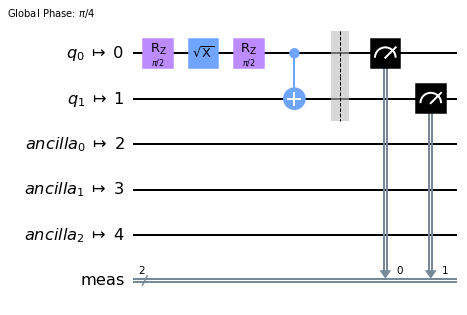

Job Status: job has successfully run


In [5]:
provider = IBMQ.get_provider("ibm-q")

from qiskit.providers.ibmq import least_busy
device = least_busy(provider.backends(filters=lambda x: x.configuration().num_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", device)

from qiskit.tools.monitor import job_monitor
transpiled = transpile(qc, device, optimization_level=3)

display(transpiled.draw(output='mpl'))

job = device.run(transpiled)
job_monitor(job, interval=2)

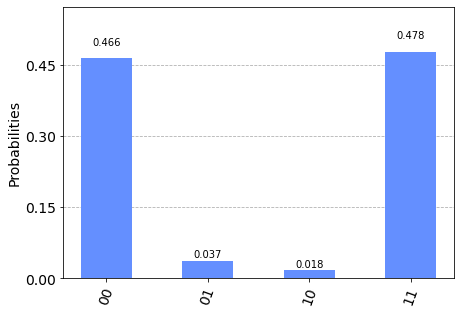

In [6]:
results = job.result()
answer = results.get_counts(qc)
plot_histogram(answer)